In [3]:
df = pd.read_csv('DLS_train.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def Binar_variable_maker(df):
    two_option_cols = []
    df =df.applymap(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else x)
    df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
    for col in df.columns:
        unique_vals = df[col].unique()  
        if len(unique_vals) == 2:
            two_option_cols.append(col)

    for col in two_option_cols:
        if 'Male' in df[col].unique():
            df[col] = df[col].replace({'Male': 1, 'Female': 0})
        else:
            df[col] = df[col].replace({'Yes': 1, 'No': 0})
    float_cols = list(set(df_numeric.columns) - set(two_option_cols))
    for i in df_numeric.columns:
        globals()[f'df{i}'] = pd.DataFrame()
        for j in range(round(min(df[i])),round(max(df[i]))):
            x = np.arange(min(df[i]), max(df[i]))
            y = []
            if i not in two_option_cols:
                        a = df.where(df[i] < j).dropna()[df.columns[0]].median()
                        b = df.where(df[i] > j).dropna()[df.columns[0]].median()
            new_row = {'lower_median': a, "upper_median": b, 'board': j}
            globals()[f'df{i}'] = globals()[f'df{i}'].append(new_row, ignore_index=True)
            globals()[f'df{i}'].dropna(inplace = True)
            globals()[f'df{i}'] = globals()[f'df{i}'].where(globals()[f'df{i}']['lower_median'] > 0)
            globals()[f'df{i}'] = globals()[f'df{i}'].where(globals()[f'df{i}']['upper_median'] > 0)
            #y.append(-(df.where(df[i] < j).dropna()[df.columns[0]].median() - df.where(df[i] > j).dropna()[df.columns[0]].median())/df.where(df[i] < j).dropna()[df.columns[0]].median())
    for i in float_cols:
        plt.plot(globals()[f'df{i}']['board'], (globals()[f'df{i}']['upper_median'] - globals()[f'df{i}']['lower_median'])/globals()[f'df{i}']['lower_median'],color ="Navy")
        plt.title(f'{i}')
        plt.xlabel('Board')
        plt.ylabel('Difference between medians')
        plt.show()

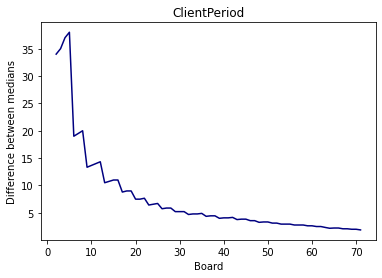

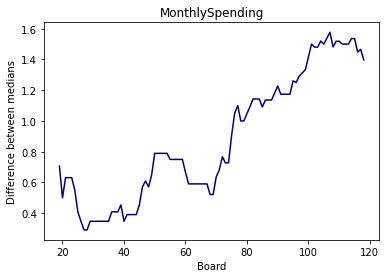

In [5]:
Binar_variable_maker(df)